In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**LOAD BOTH TEST AND TRAIN DATASET**

In [45]:
train = pd.read_csv("/content/Titanic_train.csv")
test = pd.read_csv("/content/Titanic_test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Passenger ID, Ticket and Name columns are of no use. Hence we are dropping them.**

In [46]:
train.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
test.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [49]:
train.drop(['Cabin'], axis = 1, inplace = True)
test.drop(['Cabin'], axis = 1, inplace = True)

**Cabin has too much missing values, so it is best to drop it.**

In [10]:
print(train.shape)
print(test.shape)

(891, 8)
(418, 7)


**MERGE BOTH DATASETS**

In [50]:
data = pd.concat([train, test], axis = 0)

In [51]:
data.shape

(1309, 8)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 92.0+ KB


In [53]:
data.dropna(subset=['Survived'], inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


**TREAT MISSING VALUES**

**Treating with median is increaing the skewness too much.**

**So we treated missing values with mean.**

In [55]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [54]:
mode_value = data['Age'].mode()[0]  # Get the mode (most frequent value)
data['Embarked'].fillna(mode_value, inplace=True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


# EDA

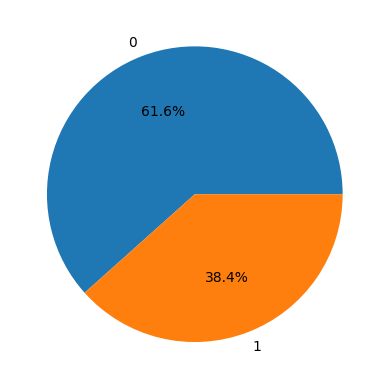

In [17]:
plt.pie(data['Survived'].value_counts(), labels = ['0', '1'], autopct = '%1.1f%%')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

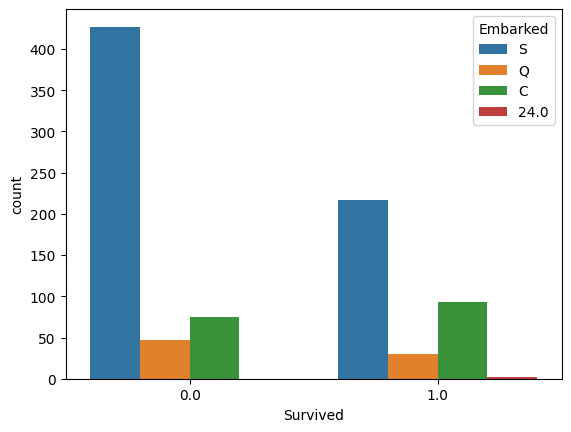

In [18]:
sns.countplot(x='Survived',data= data,hue='Embarked')

**PEOPLE WHO BOARDED FROM SOUTHAMPTON DIED MORE.**

In [19]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

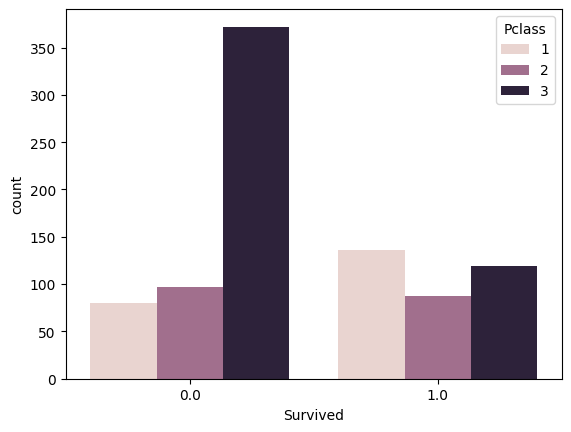

In [20]:
sns.countplot(x='Survived',data= data ,hue='Pclass')

**PEOPLE FROM 1 CLASS SURVIVED MORE AND PEOPLE FROM 3 CLASS DIED MORE.**

<Axes: xlabel='Survived', ylabel='count'>

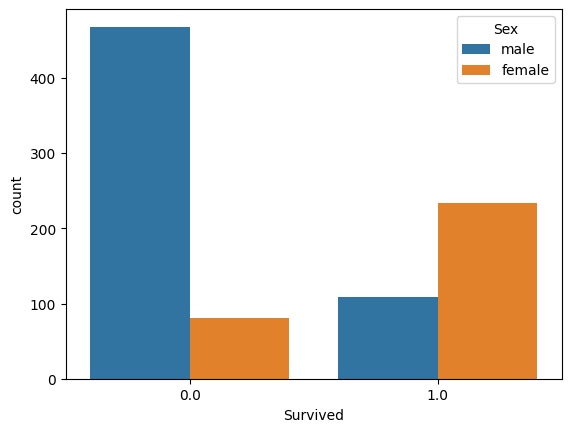

In [21]:
sns.countplot(x='Survived',data= data,hue='Sex')

**MOSTLY WOMEN SURVIVED.**

<Axes: xlabel='Survived', ylabel='count'>

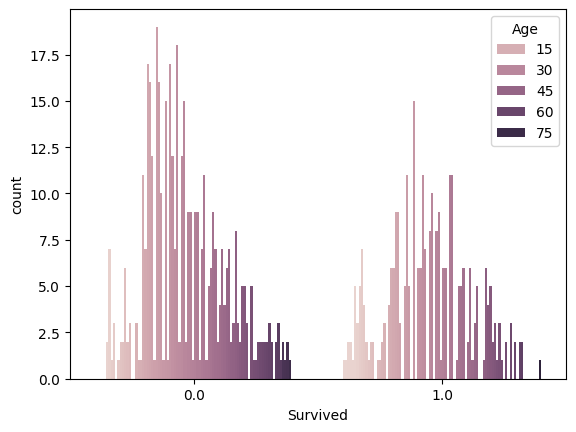

In [22]:
sns.countplot(x='Survived', data= data, hue="Age")

In [23]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

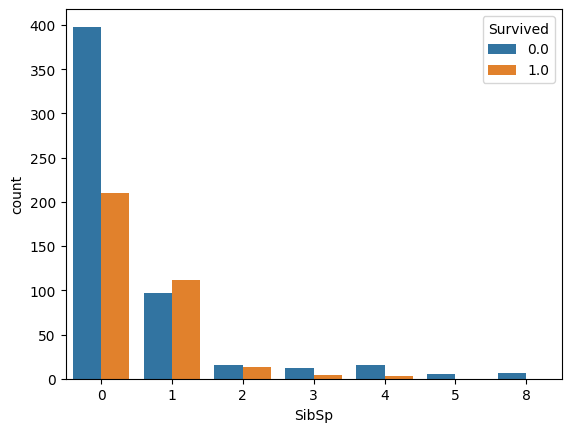

In [24]:
sns.countplot(x='SibSp',data= data,hue='Survived')

<Axes: >

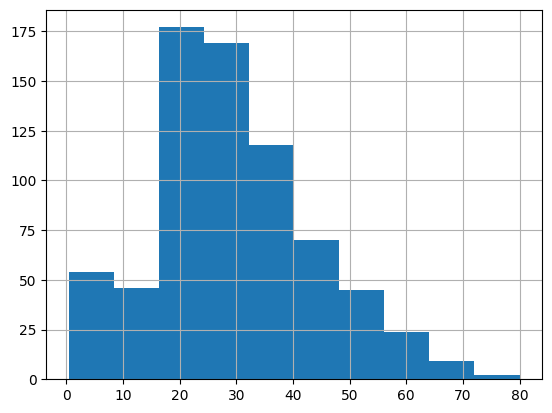

In [25]:
data['Age'].hist()

In [26]:
data['Age'].skew()

0.38910778230082704

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.select_dtypes(include='object'):
  # Convert the column to string type before applying LabelEncoder
  data[col] = data[col].astype(str)
  data[col] = le.fit_transform(data[col])

In [61]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,3
1,1.0,1,0,38.0,1,0,71.2833,1
2,1.0,3,0,26.0,0,0,7.9250,3
3,1.0,1,0,35.0,1,0,53.1000,3
4,0.0,3,1,35.0,0,0,8.0500,3


In [82]:
data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [80]:
# prompt: save this data to a csv file

data.to_csv('processed_data.csv', index=False)


In [62]:
data["Fare"] = data["Fare"].fillna(data["Fare"].mean())

# Logistic Regression

In [63]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [70]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,3
3,1,0,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x[['Age', 'Fare']] = scaler.fit_transform(x[['Age', 'Fare']])

In [72]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.592481,1,0,-0.502445,3
1,1,0,0.638789,1,0,0.786845,1
2,3,0,-0.284663,0,0,-0.488854,3
3,1,0,0.407926,1,0,0.420730,3
4,3,1,0.407926,0,0,-0.486337,3


In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn .metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score

In [77]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [78]:
y_pred = model.predict(x_test)

In [79]:


from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
F1-score: 0.7638888888888888


1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?
